<a href="https://colab.research.google.com/github/himanshuarora1703/Tutorial-notebooks/blob/main/Impute%20Missing%20Values/Impute_categorical_column.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('/content/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [52]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [53]:
df = df[['GarageQual','FireplaceQu','SalePrice']].copy()
df.head()

,GarageQual,FireplaceQu,SalePrice
0,TA,NaN,208500
1,TA,TA,181500
2,TA,TA,223500
3,TA,Gd,140000
4,TA,TA,250000


In [54]:
# check for missing values

df.isna().mean() * 100

GarageQual      5.547945
FireplaceQu    47.260274
SalePrice       0.000000
dtype: float64

In [55]:
# make X and y

X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [56]:
X

,GarageQual,FireplaceQu
0,TA,NaN
1,TA,TA
2,TA,TA
3,TA,Gd
4,TA,TA
...,...,...
1455,TA,TA
1456,TA,TA
1457,TA,Gd
1458,TA,NaN


In [57]:
# do the train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

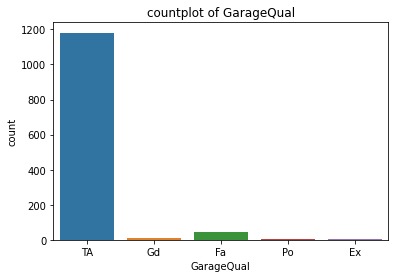

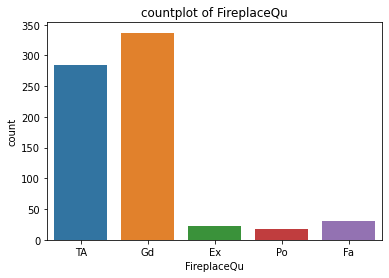

In [58]:
# check for the counts in columns
for i in X_train.columns:
    sns.countplot(x=i,data=X_train)
    plt.title(f'countplot of {i}')
    plt.show()

In [59]:
garage_mode = X_train.iloc[:,0].mode()[0]
fire_mode = X_train.iloc[:,1].mode()[0]

garage_mode,fire_mode

('TA', 'Gd')

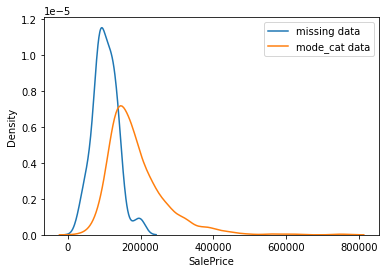

In [65]:
# check the distribution in relation to output 
missing_cat =  X_train[X_train['GarageQual'].isna()].index 
mode_cat  = X_train[X_train['GarageQual'] == garage_mode].index

sns.kdeplot(y_train[missing_cat],label='missing data')
sns.kdeplot(y_train[mode_cat],label='mode_cat data')
plt.legend()

In [66]:
X_train.isna().sum()

GarageQual      74
FireplaceQu    622
dtype: int64

In [67]:
X_train

,GarageQual,FireplaceQu
476,TA,TA
571,TA,NaN
1207,TA,NaN
995,TA,NaN
1026,TA,Gd
...,...,...
304,TA,Ex
1428,TA,Gd
1423,Gd,Gd
623,TA,TA


In [68]:
imputer = SimpleImputer(strategy='most_frequent')

X_train_impute = pd.DataFrame(imputer.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
X_train_impute

,GarageQual,FireplaceQu
476,TA,TA
571,TA,Gd
1207,TA,Gd
995,TA,Gd
1026,TA,Gd
...,...,...
304,TA,Ex
1428,TA,Gd
1423,Gd,Gd
623,TA,TA


In [39]:
# check for missing values

X_train_impute.isna().mean()

GarageQual     0.0
FireplaceQu    0.0
dtype: float64

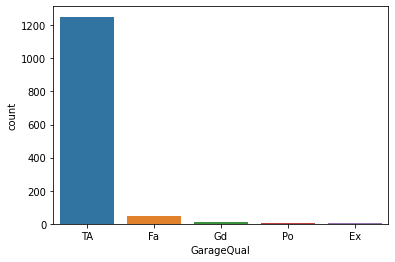

In [40]:
sns.countplot(x='GarageQual',data=X_train_impute)

In [46]:
X_train_impute['GarageQual'].value_counts()

TA    1252
Fa      45
Gd      12
Po       3
Ex       2
Name: GarageQual, dtype: int64

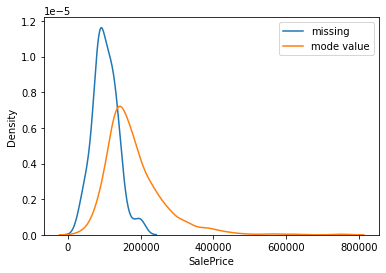

In [48]:
# check the distribution in relation to output 
X_train_missing = X_train.loc[X_train['GarageQual'].isna()].index
X_train_missing

sns.kdeplot(y_train.loc[X_train_missing],label='missing')
sns.kdeplot(y_train.loc[X_train_impute[X_train_impute['GarageQual']==garage_mode].index],label='mode value')
plt.legend()
plt.show()

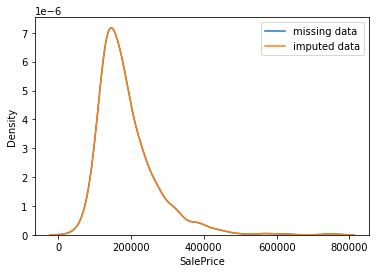

In [71]:
# check the distribution in relation to output 
missing_cat =  X_train[X_train['GarageQual']==garage_mode].index 
impute_cat  = X_train_impute[X_train_impute['GarageQual'] == garage_mode].index

sns.kdeplot(y_train[missing_cat],label='missing data')
sns.kdeplot(y_train[mode_cat],label='imputed data')
plt.legend()

In [70]:
X_train_impute['GarageQual'].value_counts()

TA    1255
Fa      42
Gd      11
Po       3
Ex       3
Name: GarageQual, dtype: int64

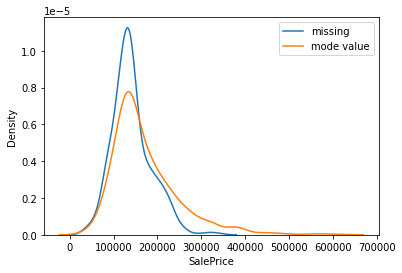

In [73]:
# check the distribution in relation to output 
X_train_missing = X_train.loc[X_train['FireplaceQu'].isna()].index
X_train_missing

sns.kdeplot(y_train.loc[X_train_missing],label='missing')
sns.kdeplot(y_train.loc[X_train_impute[X_train_impute['FireplaceQu']==fire_mode].index],label='mode value')
plt.legend()
plt.show()

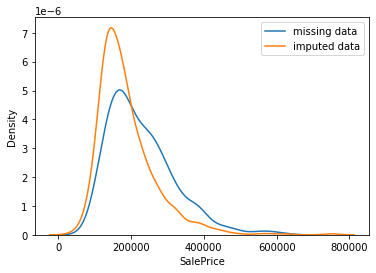

In [75]:
# check the distribution in relation to output 
missing_cat =  X_train[X_train['FireplaceQu']==fire_mode].index 
impute_cat  = X_train_impute[X_train_impute['FireplaceQu'] == fire_mode].index

sns.kdeplot(y_train[missing_cat],label='missing data')
sns.kdeplot(y_train[mode_cat],label='imputed data')
plt.legend()